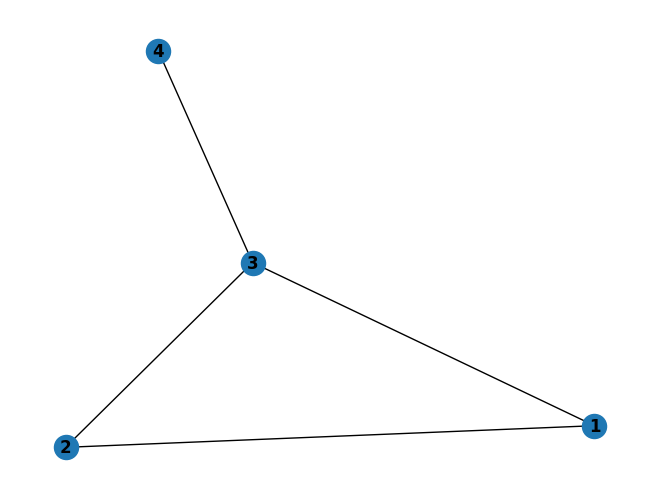

The graph is k-vertex connected with k=2: True


In [12]:
import matplotlib.pyplot as plt
from itertools import combinations
from collections import deque


def is_k_vertex_connected(graph, k):
    # Funkcija za BFS pretragu grafa
    def bfs(graph, start, excluded_nodes):
        visited = set()
        queue = deque([start])

        while queue:
            node = queue.popleft()
            visited.add(node)

            for neighbor in graph[node]:
                if neighbor not in visited and neighbor not in excluded_nodes:
                    queue.append(neighbor)

        return visited

    # Provera da li je graf povezan nakon uklanjanja k čvorova
    def is_connected_after_removal(excluded_nodes):
        remaining_nodes = set(graph.keys()) - set(excluded_nodes)
        start_node = next(iter(remaining_nodes))
        visited_nodes = bfs(graph, start_node, excluded_nodes)
        return len(visited_nodes) == len(remaining_nodes)

    # Iteracija kroz sve kombinacije k čvorova
    all_nodes = list(graph.keys())
    for excluded_nodes in combinations(all_nodes, k):
        if is_connected_after_removal(excluded_nodes):
            return True

    return False

# Primer grafa kao rečnika
graph = {
    1: [2, 3],
    2: [1, 3],
    3: [1, 2, 4],
    4: [3]
}

# Crtanje grafa
nx.draw(nx.Graph(graph), with_labels=True, font_weight='bold')
plt.show()

# Postavljanje vrednosti za k
k_value = 2

# Provera da li je graf k-vertex povezan
result = is_k_vertex_connected(graph, k_value)

print(f"The graph is k-vertex connected with k={k_value}: {result}")


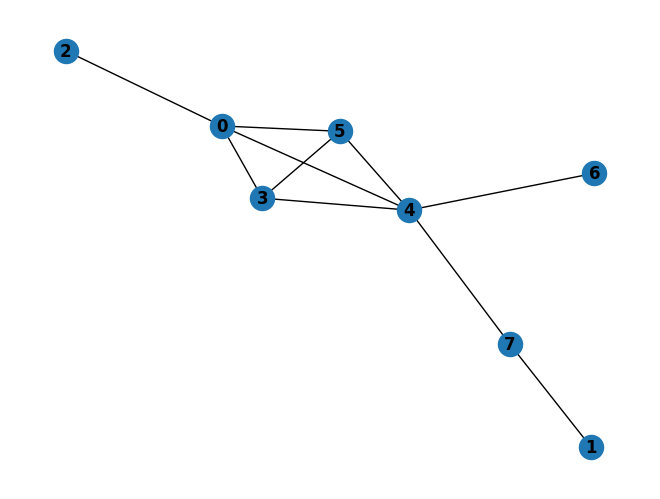

The graph is k-vertex connected with k=2: True


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

# Generate a random graph using NetworkX
num_nodes = 8
probability = 0.3
random_graph = nx.erdos_renyi_graph(num_nodes, probability)

graph_dict = {node: list(neighbor) for node, neighbor in random_graph.adjacency()}


# Draw the graph
nx.draw(random_graph, with_labels=True, font_weight='bold')
plt.show()

# Set the value for k
k_value = 2

# Test the is_k_vertex_connected function
result = is_k_vertex_connected(graph_dict, k_value)

print(f"The graph is k-vertex connected with k={k_value}: {result}")


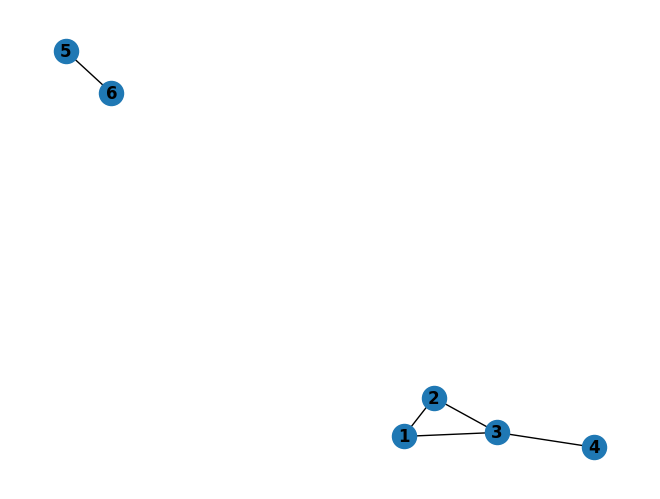

The graph is k-vertex connected with k=2: True


In [14]:
# Example graph where removing 2 vertices would disconnect it
example_graph = {
    1: [2, 3],
    2: [1, 3],
    3: [1, 2, 4],
    4: [3],
    5: [6],
    6: [5]
}

# Crtanje grafa
nx.draw(nx.Graph(example_graph), with_labels=True, font_weight='bold')
plt.show()

# Postavljanje vrednosti za k
k_value = 2

# Provera da li je graf k-vertex povezan
result = is_k_vertex_connected(example_graph, k_value)

print(f"The graph is k-vertex connected with k={k_value}: {result}")


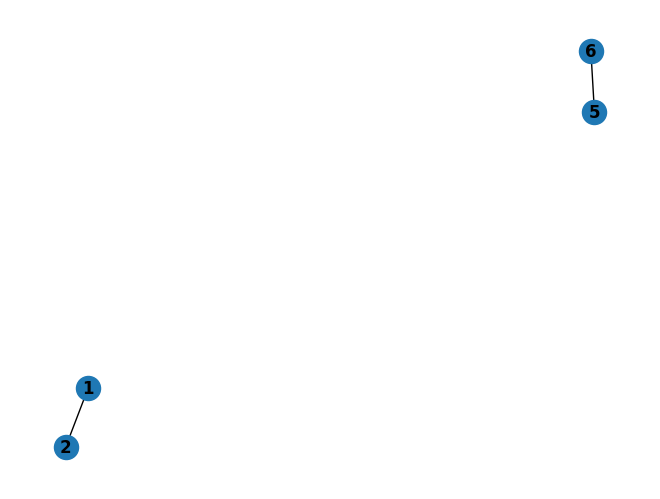

The graph is k-vertex connected with k=0: False


In [15]:
# Vertices to be removed
vertices_to_remove = [3, 4]

# Remove the vertices from the graph
for vertex in vertices_to_remove:
    del example_graph[vertex]
    for adj_list in example_graph.values():
        if vertex in adj_list:
            adj_list.remove(vertex)

# Crtanje grafa
nx.draw(nx.Graph(example_graph), with_labels=True, font_weight='bold')
plt.show()

# Postavljanje vrednosti za k
k_value = 0

# Provera da li je graf k-vertex povezan
result = is_k_vertex_connected(example_graph, k_value)

print(f"The graph is k-vertex connected with k={k_value}: {result}")
